In [1]:
import os
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(__doc__)

Automatically created module for IPython interactive environment


In [2]:
def fetch(id, col):
    print('-' * 80)
    print(id)
    path = fifs[fifs['id'] == id][col].values[0]
    print(path)
    return path
fifs = pd.read_json('fifs.json')
fifs

,id,rawpath,rawica
0,QYJ_Test_1,rawdata/QYJ/MultiTest_1_raw_tsss.fif,raw_ica/QYJ_Test_1-afterica-raw.fif
1,QYJ_Test_2,rawdata/QYJ/MultiTest_2_raw_tsss.fif,raw_ica/QYJ_Test_2-afterica-raw.fif
2,QYJ_Test_3,rawdata/QYJ/MultiTest_3_raw_tsss.fif,raw_ica/QYJ_Test_3-afterica-raw.fif
3,QYJ_Test_4,rawdata/QYJ/MultiTest_4_raw_tsss.fif,raw_ica/QYJ_Test_4-afterica-raw.fif
4,QYJ_Test_5,rawdata/QYJ/MultiTest_5_raw_tsss.fif,raw_ica/QYJ_Test_5-afterica-raw.fif
5,QYJ_Test_6,rawdata/QYJ/MultiTest_6_raw_tsss.fif,raw_ica/QYJ_Test_6-afterica-raw.fif
6,QYJ_Test_7,rawdata/QYJ/MultiTest_7_raw_tsss.fif,raw_ica/QYJ_Test_7-afterica-raw.fif
7,QYJ_Test_8,rawdata/QYJ/MultiTest_8_raw_tsss.fif,raw_ica/QYJ_Test_8-afterica-raw.fif
8,QYJ_Training_1,rawdata/QYJ/MultiTraining_1_raw_tsss.fif,raw_ica/QYJ_Training_1-afterica-raw.fif
9,QYJ_Training_2,rawdata/QYJ/MultiTraining_2_raw_tsss.fif,raw_ica/QYJ_Training_2-afterica-raw.fif


--------------------------------------------------------------------------------
ZYF_Training_1
raw_ica/ZYF_Training_1-afterica-raw.fif
Opening raw data file raw_ica/ZYF_Training_1-afterica-raw.fif...
    Range : 7000 ... 229999 =      7.000 ...   229.999 secs
Ready.
Current compensation grade : 0
--------------------------------------------------------------------------------
ZYF_Training_2
raw_ica/ZYF_Training_2-afterica-raw.fif
Opening raw data file raw_ica/ZYF_Training_2-afterica-raw.fif...
    Range : 8000 ... 226999 =      8.000 ...   226.999 secs
Ready.
Current compensation grade : 0
--------------------------------------------------------------------------------
ZYF_Training_3
raw_ica/ZYF_Training_3-afterica-raw.fif
Opening raw data file raw_ica/ZYF_Training_3-afterica-raw.fif...
    Range : 7000 ... 222999 =      7.000 ...   222.999 secs
Ready.
Current compensation grade : 0
--------------------------------------------------------------------------------
ZYF_Training_4
raw_ica

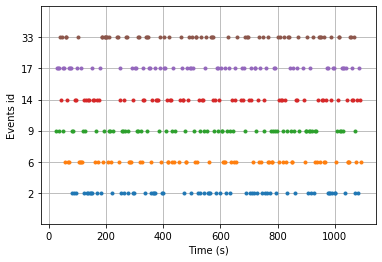

{'2': 2, '6': 6, '9': 9, '14': 14, '17': 17, '33': 33}


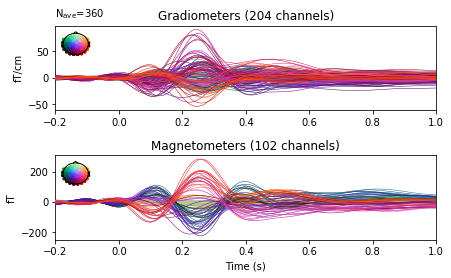

In [3]:
tmin, tmax = -0.2, 1
l_freq, h_freq = 1, 4
picks = ('meg', 'mag')
raw = mne.concatenate_raws([mne.io.read_raw_fif(fetch('ZYF_Training_{}'.format(j), col='rawica')) for j in [1, 2, 3, 4, 5]])
raw.load_data()
raw.filter(l_freq=l_freq, h_freq=h_freq)

events = mne.find_events(raw)
epochs = mne.Epochs(raw, events, picks=picks, tmin=tmin, tmax=tmax, decim=10)
epochs = epochs[['2', '6', '9', '14', '17', '33']]
event_id = epochs.event_id

events = epochs.events
mne.viz.plot_events(events, sfreq=raw.info['sfreq'])
print(event_id)

f = epochs.average().plot(spatial_colors=True)

In [4]:
import sklearn
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

In [5]:
n_jobs = 64
_svm = svm.SVC(gamma='scale', kernel='rbf', class_weight='balanced')
clf = make_pipeline(StandardScaler(), _svm, verbose=1)
raw_decoder = make_pipeline(mne.decoding.Vectorizer(), clf)
time_decoder = mne.decoding.SlidingEstimator(clf, n_jobs=n_jobs, scoring='f1')
skf = StratifiedKFold(n_splits=10)
xdawn = mne.preprocessing.Xdawn(n_components=6, reg='diagonal_fixed')

In [6]:
X = epochs.get_data()
y = events[:, -1]
print(X.shape, y.shape)

y_predict = np.zeros(X.shape[0])
y_time_predict = np.zeros((X.shape[0], X.shape[2]))
print(y_predict.shape, y_time_predict.shape)

for train, test in skf.split(X, y):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    
    raw_decoder.fit(X_train, y_train)
    y_predict[test] = raw_decoder.predict(X_test)
    
    time_decoder.fit(X_train, y_train)
    y_time_predict[test, :] = time_decoder.predict(X_test)
    
print(sklearn.metrics.classification_report(y_pred=y_predict, y_true=y))

Loading data for 360 events and 1201 original time points ...
0 bad epochs dropped
(360, 306, 121) (360,)
(360,) (360, 121)
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   7.8s
[                                                            ]   0.00% Fitting SlidingEstimator |
[                                                            ]   0.00% Transforming SlidingEstimator |
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   7.5s
[                                                            ]   0.00% Fitting SlidingEstimator |
[                                                            ]   0.00% Transforming SlidingEstimator |
[Pipeline] .... (step 1 of 2) Processing standardscaler, total=   0.2s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   7.6s
[                                               

0.1940593580018228


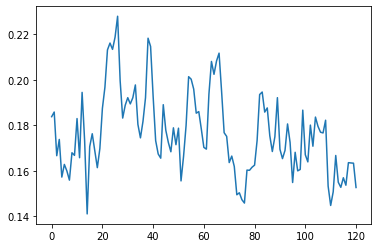

In [7]:
print(sklearn.metrics.precision_score(y_pred=y_predict, y_true=y, average='weighted'))

scores = np.zeros(y_time_predict.shape[1])
for j, y_pred in enumerate(y_time_predict.transpose()):
    scores[j] = sklearn.metrics.precision_score(y_pred=y_pred, y_true=y, average='weighted')
plt.plot(scores)

In [8]:
X = epochs.get_data()
y = events[:, -1]
print(X.shape, y.shape)

xdawn_y_predict = np.zeros(X.shape[0])
xdawn_y_time_predict = np.zeros((X.shape[0], X.shape[2]))
print(xdawn_y_predict.shape, xdawn_y_time_predict.shape)

for train, test in skf.split(X, y):
    X_train, y_train = xdawn.fit_transform(epochs[train]), y[train]
    X_test, y_test = xdawn.transform(epochs[test]), y[test]
    
    raw_decoder.fit(X_train, y_train)
    xdawn_y_predict[test] = raw_decoder.predict(X_test)
    
    time_decoder.fit(X_train, y_train)
    xdawn_y_time_predict[test, :] = time_decoder.predict(X_test)
    
print(sklearn.metrics.classification_report(y_pred=xdawn_y_predict, y_true=y))

Loading data for 360 events and 1201 original time points ...
(360, 306, 121) (360,)
(360,) (360, 121)
Loading data for 324 events and 1201 original time points ...
Computing data rank from raw with rank='full'
    MEG: rank 306 from info
Reducing data rank from 306 -> 306
Estimating covariance using DIAGONAL_FIXED
    MAG regularization : 0.1
    GRAD regularization : 0.1
Done.
Computing data rank from raw with rank='full'
    MEG: rank 306 from info
Reducing data rank from 306 -> 306
Estimating covariance using DIAGONAL_FIXED
    MAG regularization : 0.1
    GRAD regularization : 0.1
Done.
Computing data rank from raw with rank='full'
    MEG: rank 306 from info
Reducing data rank from 306 -> 306
Estimating covariance using DIAGONAL_FIXED
    MAG regularization : 0.1
    GRAD regularization : 0.1
Done.
Computing data rank from raw with rank='full'
    MEG: rank 306 from info
Reducing data rank from 306 -> 306
Estimating covariance using DIAGONAL_FIXED
    MAG regularization : 0.1
   

0.2267825097229922


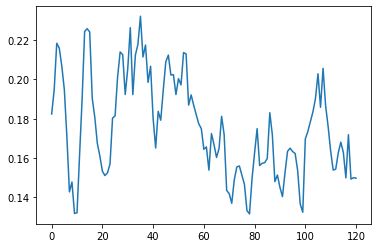

In [9]:
print(sklearn.metrics.precision_score(y_pred=xdawn_y_predict, y_true=y, average='weighted'))

xdawn_scores = np.zeros(xdawn_y_time_predict.shape[1])
for j, y_pred in enumerate(xdawn_y_time_predict.transpose()):
    xdawn_scores[j] = sklearn.metrics.precision_score(y_pred=y_pred, y_true=y, average='weighted')
plt.plot(xdawn_scores)